In [103]:
import pandas as pd 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

### Making dataset

In [71]:
x,y=make_classification(n_classes=2,n_features=10,n_samples=1000)

### spliting data

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

### Model building 

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [75]:

y_pre=lr.predict(x_test)

### Metarics

In [76]:
print("Accuracy:",accuracy_score(y_test,y_pre))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pre))
print("Classification Report:",classification_report(y_test,y_pre))

Accuracy: 0.945
Confusion Matrix:
 [[91  4]
 [ 7 98]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.96      0.94        95
           1       0.96      0.93      0.95       105

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



### Hyperparameter Tuning 

#### 1. GridSearchCV

Take the different parameter and train model with all combination and provide best parameter for our model

In [77]:
from sklearn.model_selection import GridSearchCV

### Parameters for tuning

In [78]:
penalty=['l1', 'l2', 'elasticnet']
c_values=[10,1,0.1,0.5,0.01]
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

param=dict(penalty=penalty,C=c_values,solver=solver)
param

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [10, 1, 0.1, 0.5, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [85]:
grid=GridSearchCV(estimator=lr,param_grid=param,cv=5,n_jobs=-1,scoring="accuracy")

In [86]:
grid.fit(x_train,y_train)

/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-p

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1, 0.1, 0.5, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [87]:
#best parameter for model with this dataset
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [88]:
#best score
grid.best_score_

0.91625

In [89]:
y_pre_grid=grid.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pre_grid))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pre_grid))
print("Classification Report:",classification_report(y_test,y_pre_grid))

Accuracy: 0.95
Confusion Matrix:
 [[ 90   5]
 [  5 100]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        95
           1       0.95      0.95      0.95       105

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [84]:
print("Accuracy:",accuracy_score(y_test,y_pre))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pre))
print("Classification Report:",classification_report(y_test,y_pre))

Accuracy: 0.945
Confusion Matrix:
 [[91  4]
 [ 7 98]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.96      0.94        95
           1       0.96      0.93      0.95       105

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



#### 2. Random SearchCV
It randomaly pick the provided param and try to extract the best parameters for our model

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
rcv=RandomizedSearchCV(estimator=lr,param_distributions=param,scoring='accuracy',cv=5)

In [92]:
rcv.fit(x_train,y_train)

/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-pack

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [10, 1, 0.1, 0.5, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [93]:
y_pre_rcv=grid.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pre_rcv))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pre_rcv))
print("Classification Report:",classification_report(y_test,y_pre_rcv))

Accuracy: 0.95
Confusion Matrix:
 [[ 90   5]
 [  5 100]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        95
           1       0.95      0.95      0.95       105

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [94]:
rcv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

# Logistic Regression for Multiclass Classification

In [96]:
x,y=make_classification(n_classes=3,n_features=10,n_samples=1000,n_clusters_per_class=1)

array([0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2,
       1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1,
       2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0,
       2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0,
       1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1,

In [100]:
x_train_m,x_test_m,y_train_m,y_test_m=train_test_split(x,y,random_state=42,test_size=0.20)

In [101]:
lrm=LogisticRegression(multi_class='ovr')

In [102]:
lrm.fit(x_train_m,y_train_m)

/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [104]:
y_pre_m=lrm.predict(x_test_m)


print("Accuracy:",accuracy_score(y_test_m,y_pre_m))
print("Confusion Matrix:\n",confusion_matrix(y_test_m,y_pre_m))
print("Classification Report:",classification_report(y_test_m,y_pre_m))

Accuracy: 0.9
Confusion Matrix:
 [[60  2  4]
 [ 6 52  4]
 [ 1  3 68]]
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.91      0.90        66
           1       0.91      0.84      0.87        62
           2       0.89      0.94      0.92        72

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



# Logistic Regression with Imbalanced Class

In [142]:
x,y=make_classification(n_classes=2,n_features=2,n_samples=10000,n_clusters_per_class=1,weights=[.99],n_redundant=0)

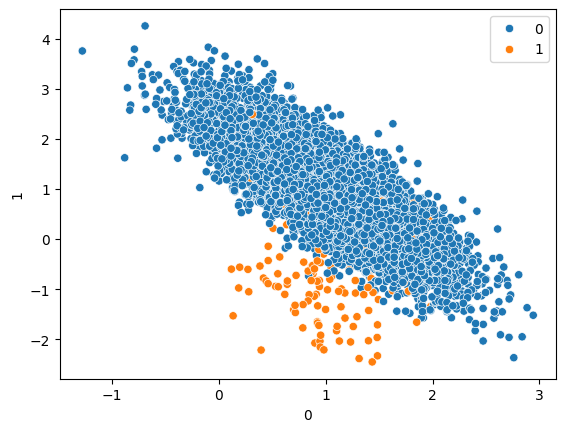

In [143]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)
plt.show()

In [144]:
x_train_i,x_test_i,y_train_i,y_test_i=train_test_split(x,y,random_state=42,test_size=0.20)

In [145]:
lri=LogisticRegression()
lri.fit(x_train_i,y_train_i)
y_pre_i=lri.predict(x_test_i)
print("Accuracy:",accuracy_score(y_test_i,y_pre_i))
print("Confusion Matrix:\n",confusion_matrix(y_test_i,y_pre_i))
print("Classification Report:",classification_report(y_test_i,y_pre_i))



Accuracy: 0.993
Confusion Matrix:
 [[1973    1]
 [  13   13]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1974
           1       0.93      0.50      0.65        26

    accuracy                           0.99      2000
   macro avg       0.96      0.75      0.82      2000
weighted avg       0.99      0.99      0.99      2000



In [147]:
penalty=['l1', 'l2', 'elasticnet']
c_values=[10,1,0.1,0.5,0.01]
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
class_weight=[ {0:w,1:i} for i in [10,50,100] for w in [10,50,100] ]

param=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)
param

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [10, 1, 0.1, 0.5, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 10, 1: 10},
  {0: 50, 1: 10},
  {0: 100, 1: 10},
  {0: 10, 1: 50},
  {0: 50, 1: 50},
  {0: 100, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 100},
  {0: 100, 1: 100}]}

In [148]:
grd=GridSearchCV(estimator=lri,param_grid=param,cv=5,n_jobs=-1)

In [149]:
grd.fit(x_train_i,y_train_i)
y_pre_i=lri.predict(x_test_i)
print("Accuracy:",accuracy_score(y_test_i,y_pre_i))
print("Confusion Matrix:\n",confusion_matrix(y_test_i,y_pre_i))
print("Classification Report:",classification_report(y_test_i,y_pre_i))

/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means

Accuracy: 0.993
Confusion Matrix:
 [[1973    1]
 [  13   13]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1974
           1       0.93      0.50      0.65        26

    accuracy                           0.99      2000
   macro avg       0.96      0.75      0.82      2000
weighted avg       0.99      0.99      0.99      2000



In [150]:
grd.best_estimator_

LogisticRegression(C=10, class_weight={0: 50, 1: 100}, penalty='l1',
                   solver='liblinear')

In [151]:
grd.best_score_

0.993375